<hr>
<center><h3 style="text-decoration:underline">Assignment 4</h3></center>
<p><b>Name</b>: Harikesh Kushwaha</p>
<p><b>Entry Number</b>: 2021PHS7181</p>
<hr>

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

> **Note:** All the combinations I have done and output files related to them can be found on github: <a href="https://github.com/Hari31416/Academic/tree/main/Codes/Assignment4">Assignment4</a>.

### Plot

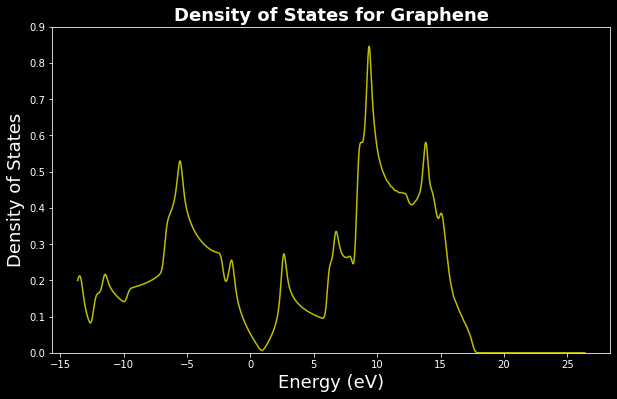

In [4]:
#directory for the dat file
data_dir = os.path.join('kgrid5', "run4", "KS_DOS_total.dat")
#directory for the control file
control_dir = os.path.join('kgrid5', "run4", "control.in")

#Extracting the data from the dat file
data = np.loadtxt(data_dir)
#Ignoring the last column whch gives DOS for spin down and is exactly the same as spin up
data = data[:, :2]

#Plotting the figure
plt.figure(figsize=(10,6))
plt.plot(data[:, 0], data[:, 1], "y")
plt.xlabel("Energy (eV)", fontdict={"size": 18})
plt.ylabel("Density of States", fontdict={"size": 18})
plt.title("Density of States for Graphene", 
            fontdict={"size": 18, "weight": "bold"})
plt.ylim(0, 0.9);

### Keywords

>The keywords for the above plot are:

In [5]:
with open(control_dir, 'r') as f:
    texts = f.readlines()
    print("".join(texts[16:25]))

  ####### keywords for DOS########
  k_grid  8 8 1
##########################
#  relax_geometry trm 5E-5
#  sc_accuracy_forces 1e-6

##########################
  output dos -20 20 10000 0.15
  dos_kgrid_factors 10 10 2



This completes the assignment. Some more details are provided below but you might ignore them.

### Extras

The plots formed for the same keywords as above but different values of `dos_kgrid_factors` are almost the same, given that the `dos_kgrid_factors` is greater than `5`. For reference, the plots for these keywords are given below:

In [8]:
def visualize(directory):
    data_dir = os.path.join(directory, "KS_DOS_total.dat")
    control_dir = os.path.join(directory, "control.in")
    
    with open(control_dir, "r") as f:
        texts = f.readlines()
        text = list(filter(lambda x: "dos_kgrid_factors" in x, texts))[0].strip()
        value = text.split("rs")[-1]
        
    data = np.loadtxt(data_dir)
    data = data[:, :2]
    plt.figure(figsize=(10,6))
    plt.plot(data[:, 0], data[:, 1], "y")
    plt.xlabel("Energy (eV)", fontdict={"size": 16})
    plt.ylabel("Density of States", fontdict={"size": 16})
    plt.title(f"DOS = {value}", 
                fontdict={"size": 18, "weight": "bold"})
    plt.ylim(0, 0.9);

aims_sub.sh is Not a directory
control.in is Not a directory
geometry.in is Not a directory
tool.ipynb is Not a directory
visualize.ipynb is Not a directory


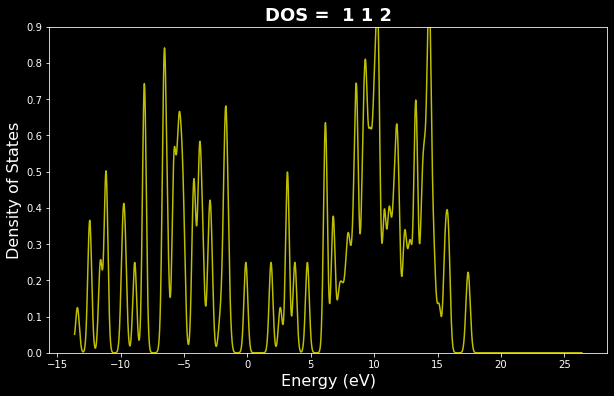

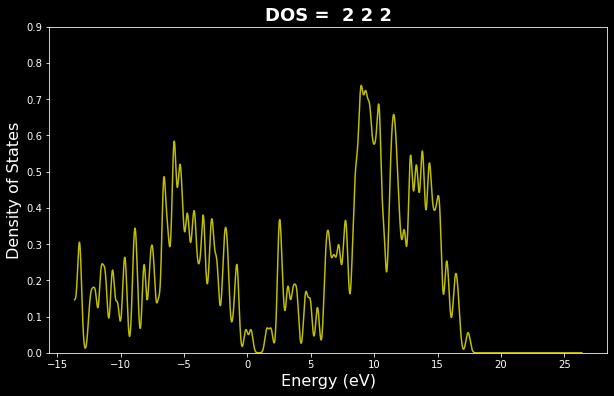

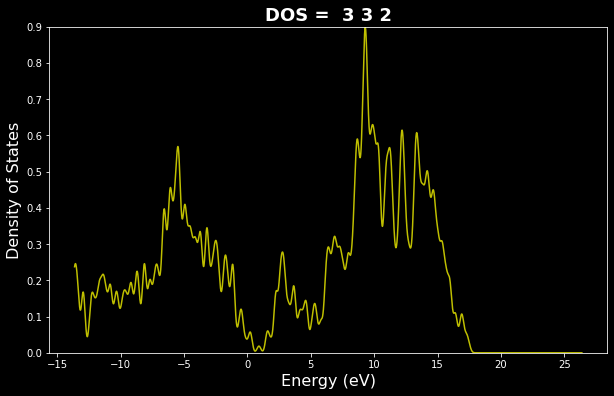

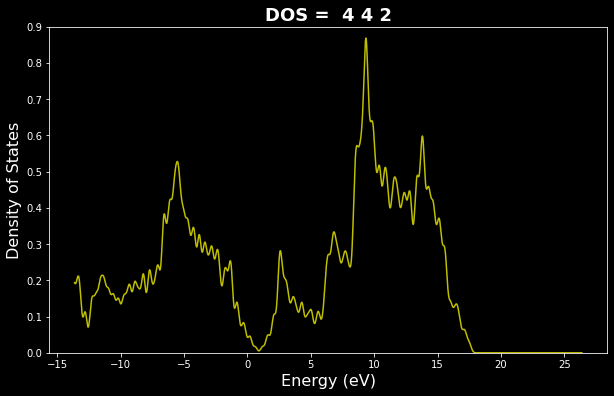

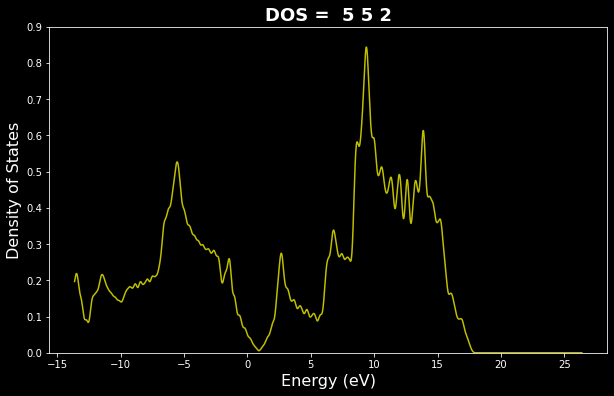

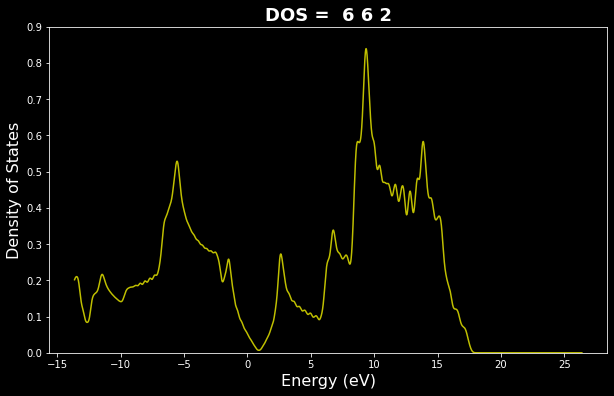

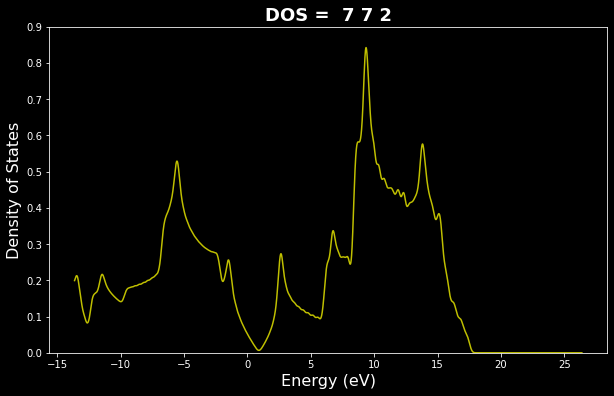

In [9]:
for dir in os.listdir("kgrid4"):
    if "." not in dir:
        try:
            directory = os.path.join("kgrid4", dir)
            visualize(directory)
        except BaseException as e:
            print("No Data File Found.")
    else:
        print(f"{dir} is NOT a directory")

aims_sub.sh is Not a directory
control.in is Not a directory
geometry.in is Not a directory
tool.ipynb is Not a directory
visualize.ipynb is Not a directory


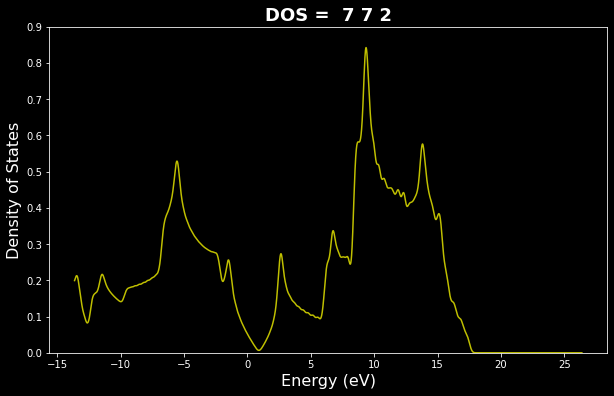

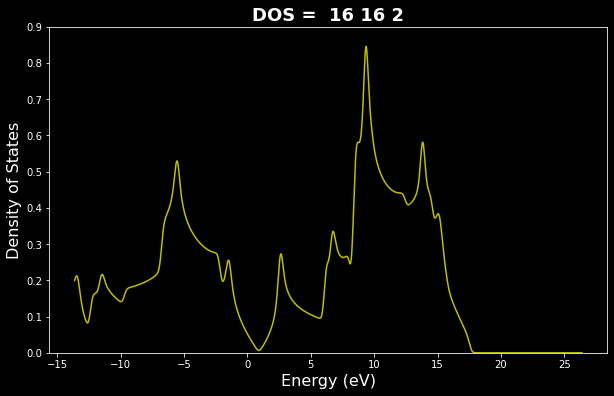

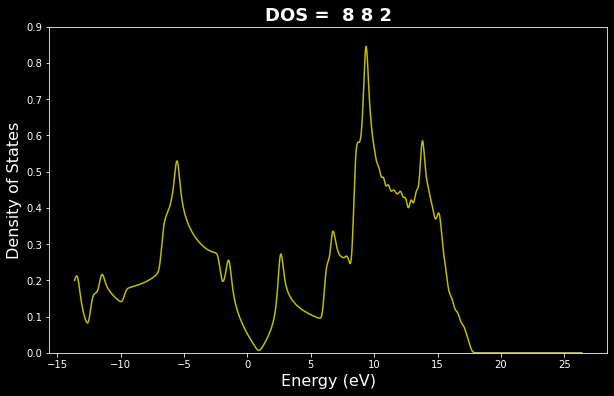

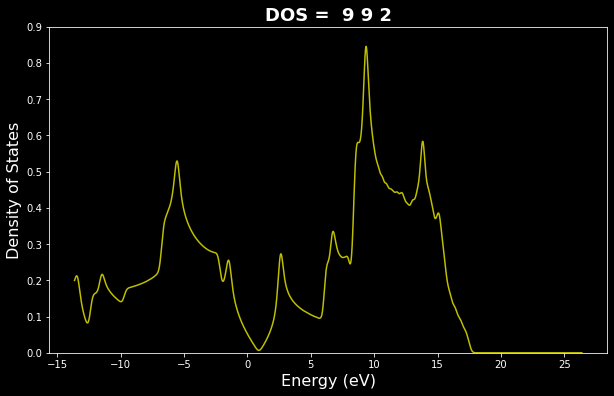

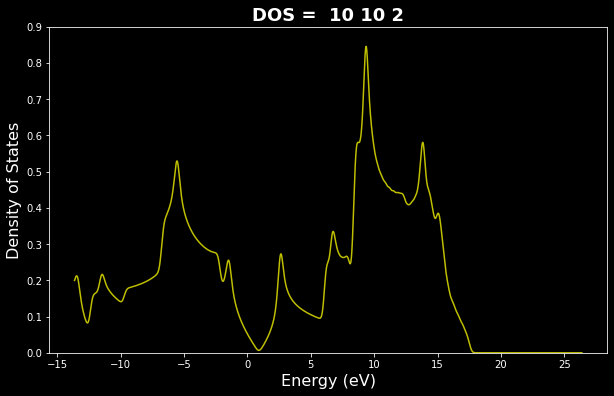

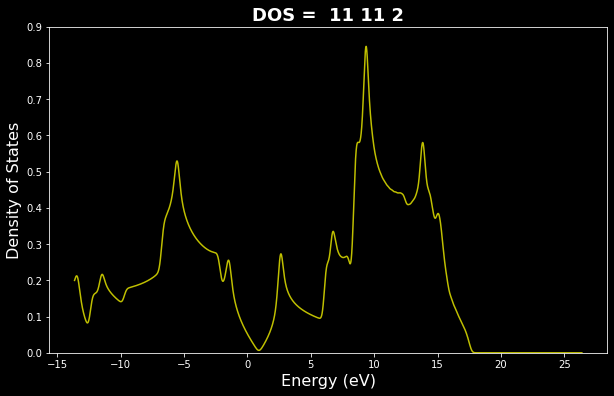

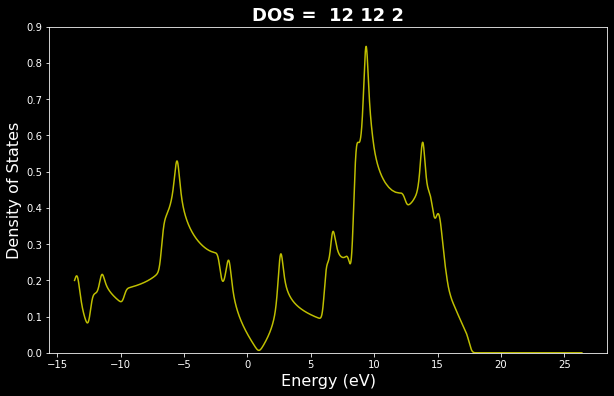

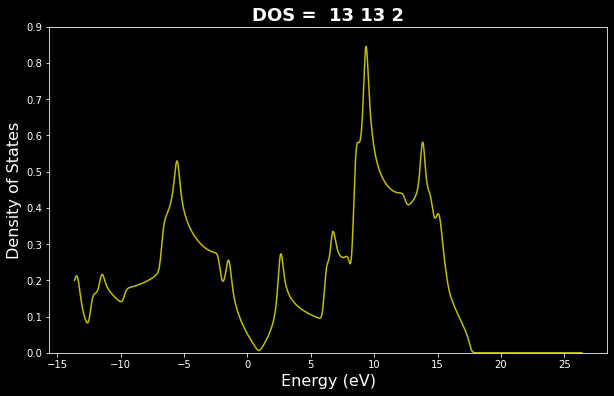

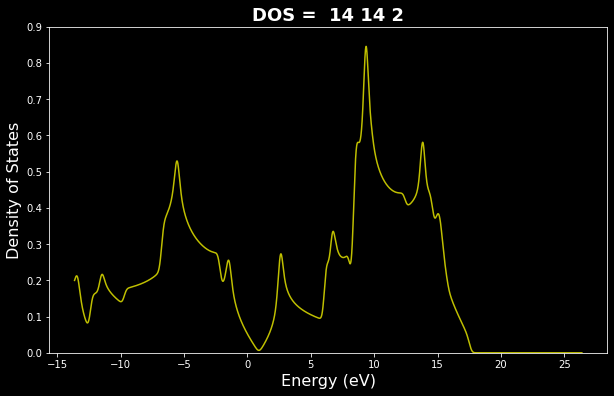

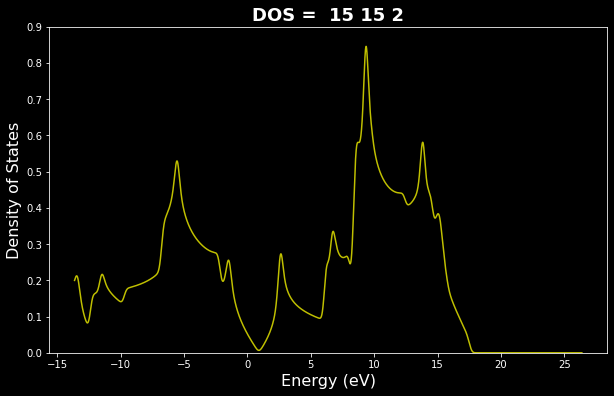

In [11]:
for dir in os.listdir("kgrid5"):
    if "." not in dir:
        try:
            directory = os.path.join("kgrid5", dir)
            visualize(directory)
        except BaseException as e:
            print("No Data File Found.")
    else:
        print(f"{dir} is NOT a directory")

As you can see the plot starts to smoothen after `dos_kgrid_factors` attains the value of ` 5 5 2` and becomes very smooth at `10 10 2`. This is why I chose this value of `dos_kgrid_factors`.